**Theory required for the movie recommendation system**

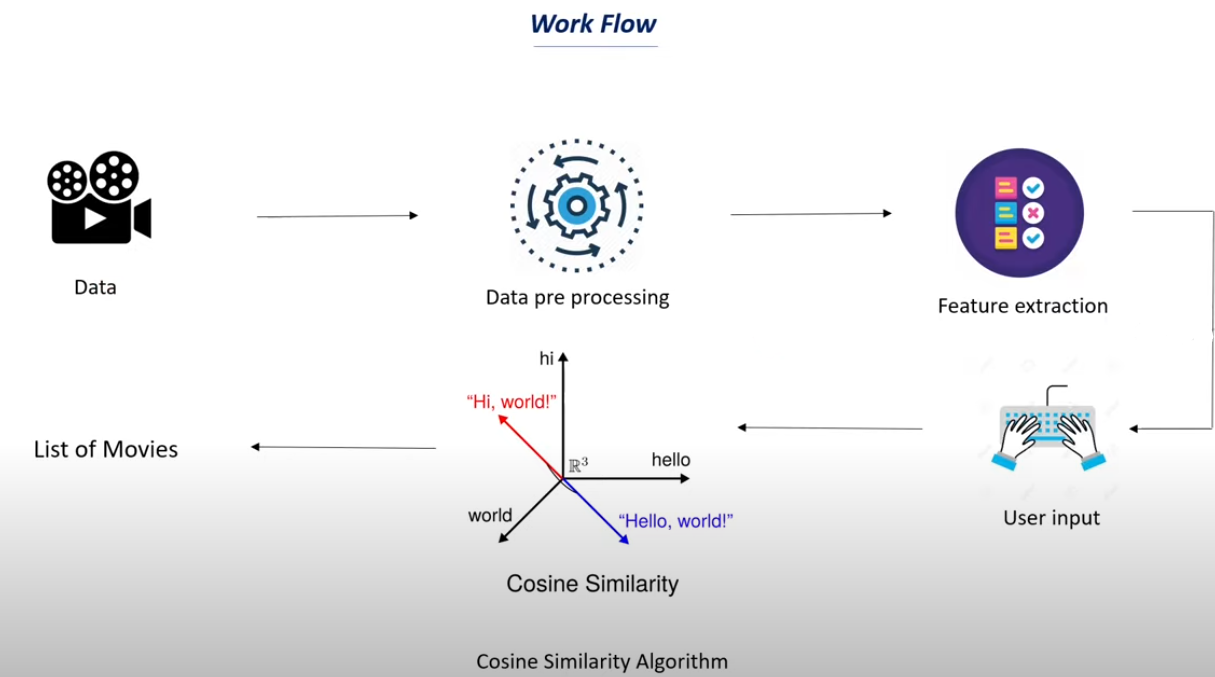

**What is Cosine Similarity**

Cosine similarity is a measure of similarity between two non-zero vectors in an inner product space. It measures the cosine of the angle between them. It's often used in information retrieval and text mining as a measure of similarity between documents, text snippets, or any other kind of text data.

The formula for cosine similarity between two vectors \( A \) and \( B \) is given by: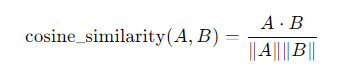

}
\]

Where:
- \( A \cdot B \) denotes the dot product of vectors \( A \) and \( B \).
- \( \|A\| \) denotes the Euclidean norm (magnitude) of vector \( A \).
- \( \|B\| \) denotes the Euclidean norm (magnitude) of vector \( B \).

The cosine similarity ranges from -1 to 1, with -1 indicating exactly opposite vectors, 1 indicating exactly the same vectors, and 0 indicating orthogonality (perpendicularity) between the vectors.

Here's a simple Python code to compute cosine similarity between two vectors using NumPy:

```python
import numpy as np

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity

# Example vectors
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

# Compute cosine similarity
similarity = cosine_similarity(vector1, vector2)
print("Cosine similarity:", similarity)
```

This code takes two vectors as input, computes their dot product, and divides it by the product of their magnitudes (norms) to calculate cosine similarity. Finally, it prints out the computed similarity.

In [1]:
import numpy as np

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity

# Example vectors
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

# Compute cosine similarity
similarity = cosine_similarity(vector1, vector2)
print("Cosine similarity:", similarity)


Cosine similarity: 0.9746318461970762


Let's reassess the interpretation of the cosine similarity in the context of the example vectors [1, 2, 3] and [4, 5, 6].

Cosine similarity measures the similarity in direction between two vectors in a multi-dimensional space. In this case, the vectors represent shopping preferences, where each element of the vector corresponds to the quantity of a particular item.

The cosine similarity value of approximately 0.975 between the vectors [1, 2, 3] and [4, 5, 6] suggests that there is some alignment or similarity in the patterns of quantities between the two shopping lists, but it doesn't necessarily mean that they are identical or even very similar.

Here's a potential interpretation:

- The direction of the vectors is somewhat similar, which means that there are some similarities in the quantities of items between the two shopping lists. For example, both lists might have relatively higher quantities of certain items compared to others.

- However, the specific quantities are not identical. For instance, the first list has fewer of each item compared to the second list.

So, while the cosine similarity indicates some level of similarity in the general pattern of shopping preferences between the two lists, it doesn't imply that the lists are exactly the same or even very similar. It just suggests that there are some similarities in the distribution of quantities across items.

**What is the 'TfidfVectorizer', what it does??**

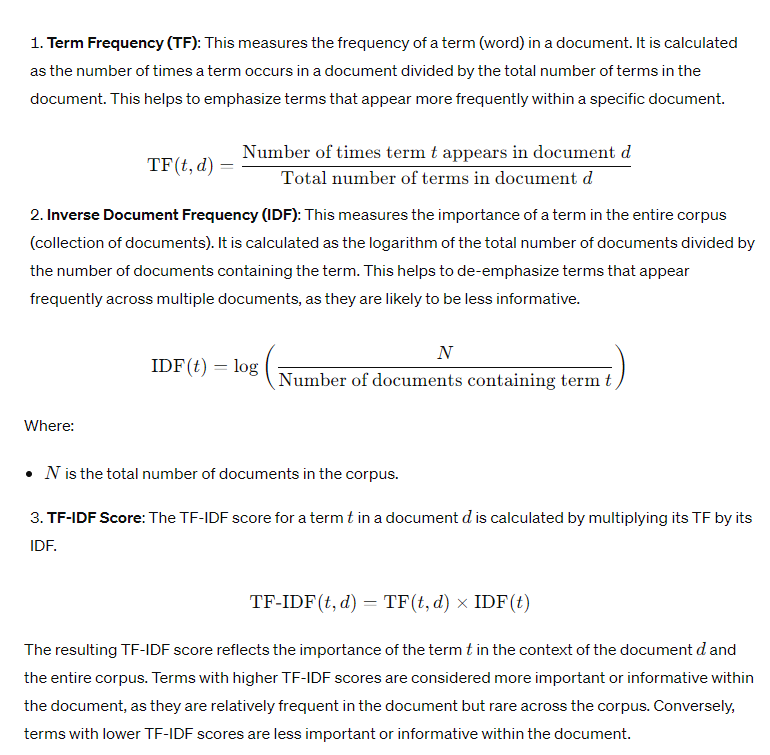

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example documents
documents = [
    "This is the first document.",
   "This document is the second document.",
   "And this is the third one.",
   "Is this the first document?",
]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

# Print feature names
print("\nFeature Names:")
print(feature_names)


TF-IDF Matrix:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]

Feature Names:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


Below is one of the movie recommendation System:

In [9]:
import os
import numpy as np
import pandas as pd
import warnings
import difflib
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
os.environ["OMP_NUM_THREADS"] = "1" 
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 
# Suppress UserWarning related to KMeans memory leak
warnings.filterwarnings("ignore", category=UserWarning)



# loading the data from the csv file to apandas dataframe
data_location = r'C:\Users\pedam\Documents\src_data\movies.csv'

movies_data = pd.read_csv(data_location)

print(tabulate(movies_data.head(), headers='keys', tablefmt='psql'))

+----+---------+-----------+------------------------------------------+----------------------------------------------+--------+------------------------------------------------------------------------------+---------------------+------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------

In [11]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [12]:
movies_data.shape

(4803, 24)

In [13]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [15]:
movies_data[selected_features]

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton
...,...,...,...,...,...
4798,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,"He didn't come looking for trouble, but troubl...",Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez
4799,Comedy Romance,NaN,A newlywed couple's honeymoon is upended by th...,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns
4800,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,NaN,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith
4801,NaN,NaN,A New Yorker in Shanghai,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia


In [16]:
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [17]:
movies_data[selected_features]

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton
...,...,...,...,...,...
4798,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,"He didn't come looking for trouble, but troubl...",Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez
4799,Comedy Romance,,A newlywed couple's honeymoon is upended by th...,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns
4800,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith
4801,,,A New Yorker in Shanghai,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia


In [18]:
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [23]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [22]:
#print(tabulate(combined_features, headers='keys', tablefmt='psql'))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [25]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [26]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [27]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [28]:
similarity = cosine_similarity(feature_vectors)

In [29]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [30]:
print(similarity.shape)

(4803, 4803)


**Getting the movie name from the user**

In [31]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name :  Terminator


In [32]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [33]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['The Terminator', 'Terminator Genisys', 'The Aviator']


In [34]:
close_match = find_close_match[0]
print(close_match)

The Terminator


In [35]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

3439


In [36]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.12480340331169382), (1, 0.034584214898631685), (2, 0.0066396941531620055), (3, 0.03251013237509891), (4, 0.06836145403893923), (5, 0.02604835979288664), (6, 0.0), (7, 0.029328517578801845), (8, 0.011654119000802857), (9, 0.006399755354855168), (10, 0.1141397723702275), (11, 0.011143131400476743), (12, 0.017537195131619197), (13, 0.02318044886614199), (14, 0.09874753799596403), (15, 0.0), (16, 0.027809669026105526), (17, 0.00633874471994718), (18, 0.08221837559639687), (19, 0.014801088234824391), (20, 0.011729762911338384), (21, 0.005446368118487068), (22, 0.004776871009758756), (23, 0.00914695460313755), (24, 0.03239206920249841), (25, 0.05110596284613303), (26, 0.03026958073429826), (27, 0.03680180823675636), (28, 0.051091307787333035), (29, 0.03271766804095004), (30, 0.032045963060645576), (31, 0.03895056243302879), (32, 0.011046931581187993), (33, 0.03521911349832008), (34, 0.0), (35, 0.05373010069883703), (36, 0.04841510848909464), (37, 0.03784502713518707), (38, 0.006623118

In [37]:
len(similarity_score)

4803

In [38]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(3439, 1.0), (279, 0.38860434541925903), (108, 0.36342338341686814), (2403, 0.29843706562331657), (93, 0.2956594881073056), (43, 0.2325677038202857), (1725, 0.19418186280151034), (286, 0.18450601523001742), (2433, 0.18028960709200476), (634, 0.1789020092800192), (125, 0.1729432854412031), (2444, 0.1712313959877991), (3014, 0.16308572661113563), (4401, 0.16249149799075477), (322, 0.16101208066006162), (123, 0.15829193667829297), (510, 0.15750439394443255), (95, 0.15542093215931807), (282, 0.1542111450857223), (2047, 0.15383401578088585), (1959, 0.15167377243231853), (224, 0.14927762749024487), (422, 0.14884972659453488), (4266, 0.14874137241044352), (1608, 0.14586438323608739), (2654, 0.1457316934219378), (207, 0.14560278763155787), (1099, 0.14156612785583564), (4574, 0.1375594215945904), (1568, 0.1344689207999927), (1653, 0.13331737583999265), (196, 0.1317135925631783), (587, 0.12951392062059405), (1930, 0.12687822530352458), (1782, 0.12520660255054059), (0, 0.12480340331169382), (993

In [41]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1
suggested_movie_list = []
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    suggested_movie_list.append(title_from_index) 
    i+=1

Movies suggested for you : 

1 . The Terminator
2 . Terminator 2: Judgment Day
3 . Terminator Genisys
4 . Aliens
5 . Terminator 3: Rise of the Machines
6 . Terminator Salvation
7 . Blade Runner
8 . Eraser
9 . Superman IV: The Quest for Peace
10 . The Matrix
11 . The Matrix Reloaded
12 . Damnation Alley
13 . The Dead Zone
14 . The Helix... Loaded
15 . The Fifth Element
16 . The Matrix Revolutions
17 . Children of Men
18 . Interstellar
19 . True Lies
20 . Megiddo: The Omega Code 2
21 . Star Trek IV: The Voyage Home
22 . RoboCop
23 . The 6th Day
24 . House at the End of the Drive
25 . The Running Man
26 . Automata
27 . Total Recall
28 . Shadow Conspiracy
29 . Roadside


In [42]:
print(suggested_movie_list)

['The Terminator', 'Terminator 2: Judgment Day', 'Terminator Genisys', 'Aliens', 'Terminator 3: Rise of the Machines', 'Terminator Salvation', 'Blade Runner', 'Eraser', 'Superman IV: The Quest for Peace', 'The Matrix', 'The Matrix Reloaded', 'Damnation Alley', 'The Dead Zone', 'The Helix... Loaded', 'The Fifth Element', 'The Matrix Revolutions', 'Children of Men', 'Interstellar', 'True Lies', 'Megiddo: The Omega Code 2', 'Star Trek IV: The Voyage Home', 'RoboCop', 'The 6th Day', 'House at the End of the Drive', 'The Running Man', 'Automata', 'Total Recall', 'Shadow Conspiracy', 'Roadside']


In [43]:
listed_movies = movies_data[movies_data['original_title'].isin(suggested_movie_list)]

In [52]:
lol = [['original_title'], selected_features]
fol =  [item for sublist in lol for item in sublist]
print(fol)

['original_title', 'genres', 'keywords', 'tagline', 'cast', 'director']


In [53]:
listed_movies[fol]

,original_title,genres,keywords,tagline,cast,director
43,Terminator Salvation,Action Science Fiction Thriller,saving the world artificial intelligence proph...,The End Begins.,Christian Bale Sam Worthington Anton Yelchin M...,McG
93,Terminator 3: Rise of the Machines,Action Thriller Science Fiction,saving the world artificial intelligence man v...,The Machines Will Rise.,Arnold Schwarzenegger Nick Stahl Claire Danes ...,Jonathan Mostow
95,Interstellar,Adventure Drama Science Fiction,saving the world artificial intelligence fathe...,Mankind was born on Earth. It was never meant ...,Matthew McConaughey Jessica Chastain Anne Hath...,Christopher Nolan
108,Terminator Genisys,Science Fiction Action Thriller Adventure,saving the world artificial intelligence cybor...,Reset the future,Arnold Schwarzenegger Jason Clarke Emilia Clar...,Alan Taylor
123,The Matrix Revolutions,Adventure Action Thriller Science Fiction,saving the world artificial intelligence man v...,Everything that has a beginning has an end.,Keanu Reeves Laurence Fishburne Carrie-Anne Mo...,Lilly Wachowski
125,The Matrix Reloaded,Adventure Action Thriller Science Fiction,saving the world artificial intelligence man v...,Free your mind.,Keanu Reeves Carrie-Anne Moss Laurence Fishbur...,Lilly Wachowski
207,Total Recall,Action Adventure Science Fiction,oxygen falsely accused resistance mars double ...,"They stole his mind, now he wants it back.",Arnold Schwarzenegger Sharon Stone Rachel Tico...,Paul Verhoeven
224,RoboCop,Action Science Fiction,cyborg future dystopia police remake,We've got the future under control.,Joel Kinnaman Gary Oldman Michael Keaton Abbie...,Jos\u00e9 Padilha
279,Terminator 2: Judgment Day,Action Thriller Science Fiction,cyborg shotgun post-apocalyptic dystopia moral...,It's nothing personal.,Arnold Schwarzenegger Linda Hamilton Robert Pa...,James Cameron
282,True Lies,Action Thriller,spy terrorist florida gun kidnapping,"When he said I do, he never said what he did.",Arnold Schwarzenegger Jamie Lee Curtis Tom Arn...,James Cameron
